In [22]:
# import libraries

import pandas as pd
import xarray as xr
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# read in files

folderpath = '../data/data_frames/'
paths = Path(folderpath).glob('team*.csv')
pathlist = list(paths)

# data cleaning of visual datasets

data = pd.concat(map(pd.read_csv, pathlist), ignore_index=True)

In [39]:
# calculate error fields

data['team_error'] = data['team_icecon'] - data['visual_ice']
data['bootstrap_error'] = data['bootstrap_icecon'] - data['visual_ice']
data['rmse_team'] = (data['team_error']**2)**0.5
data['rmse_bootstrap'] = (data['bootstrap_error']**2)**0.5
data['date'] = pd.to_datetime(data['time'], yearfirst=True)
data = data.drop(columns=['Unnamed: 0', 'crs', 'time'])


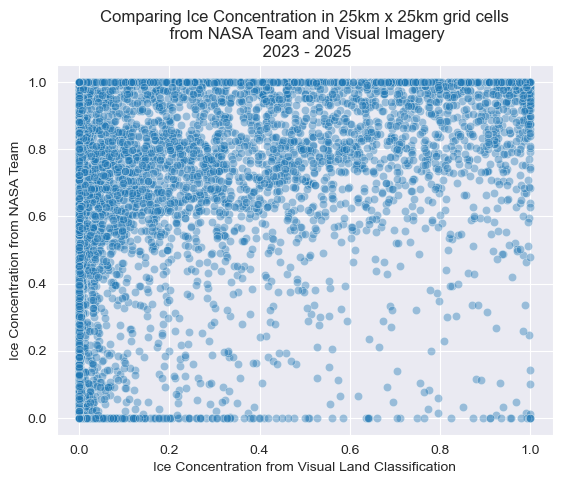

In [ ]:
# plot team against visual

sns.set_style('darkgrid')
ax = sns.scatterplot(x = data['visual_ice'], y = data['team_icecon'], alpha=0.4)
plt.xlabel('Ice Concentration from Visual Land Classification')
plt.ylabel('Ice Concentration from NASA Team')
plt.title('Comparing Ice Concentration in 25km x 25km grid cells\n from NASA Team and Visual Imagery\n 2023 - 2025')
plt.show()
plt.close()

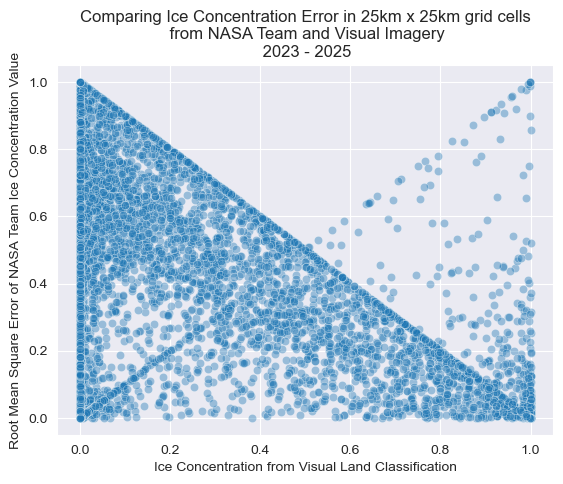

In [32]:
# plot team error

sns.set_style('darkgrid')
ax = sns.scatterplot(x = data['visual_ice'], y = data['rmse_team'], alpha=0.4)
plt.xlabel('Ice Concentration from Visual Land Classification')
plt.ylabel('Root Mean Square Error of NASA Team Ice Concentration Value')
plt.title('Comparing Ice Concentration Error in 25km x 25km grid cells\n from NASA Team and Visual Imagery\n 2023 - 2025')
plt.show()
plt.close()

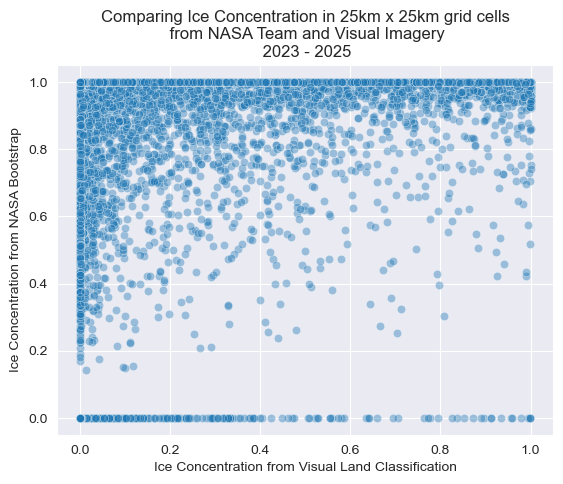

In [ ]:
# plot bootstrap against visual

sns.set_style('darkgrid')
ax = sns.scatterplot(x = data['visual_ice'], y = data['bootstrap_icecon'], alpha=0.4)
plt.xlabel('Ice Concentration from Visual Land Classification')
plt.ylabel('Ice Concentration from NASA Bootstrap')
plt.title('Comparing Ice Concentration in 25km x 25km grid cells\n from NASA Team and Visual Imagery\n 2023 - 2025')
plt.show()
plt.close()

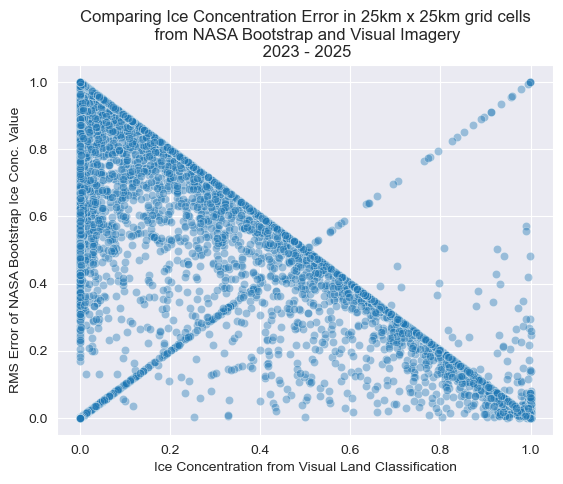

In [36]:
# plot bootstrap error

sns.set_style('darkgrid')
ax = sns.scatterplot(x = data['visual_ice'], y = data['rmse_bootstrap'], alpha=0.4)
plt.xlabel('Ice Concentration from Visual Land Classification')
plt.ylabel('RMS Error of NASA Bootstrap Ice Conc. Value')
plt.title('Comparing Ice Concentration Error in 25km x 25km grid cells\n from NASA Bootstrap and Visual Imagery\n 2023 - 2025')
plt.show()
plt.close()

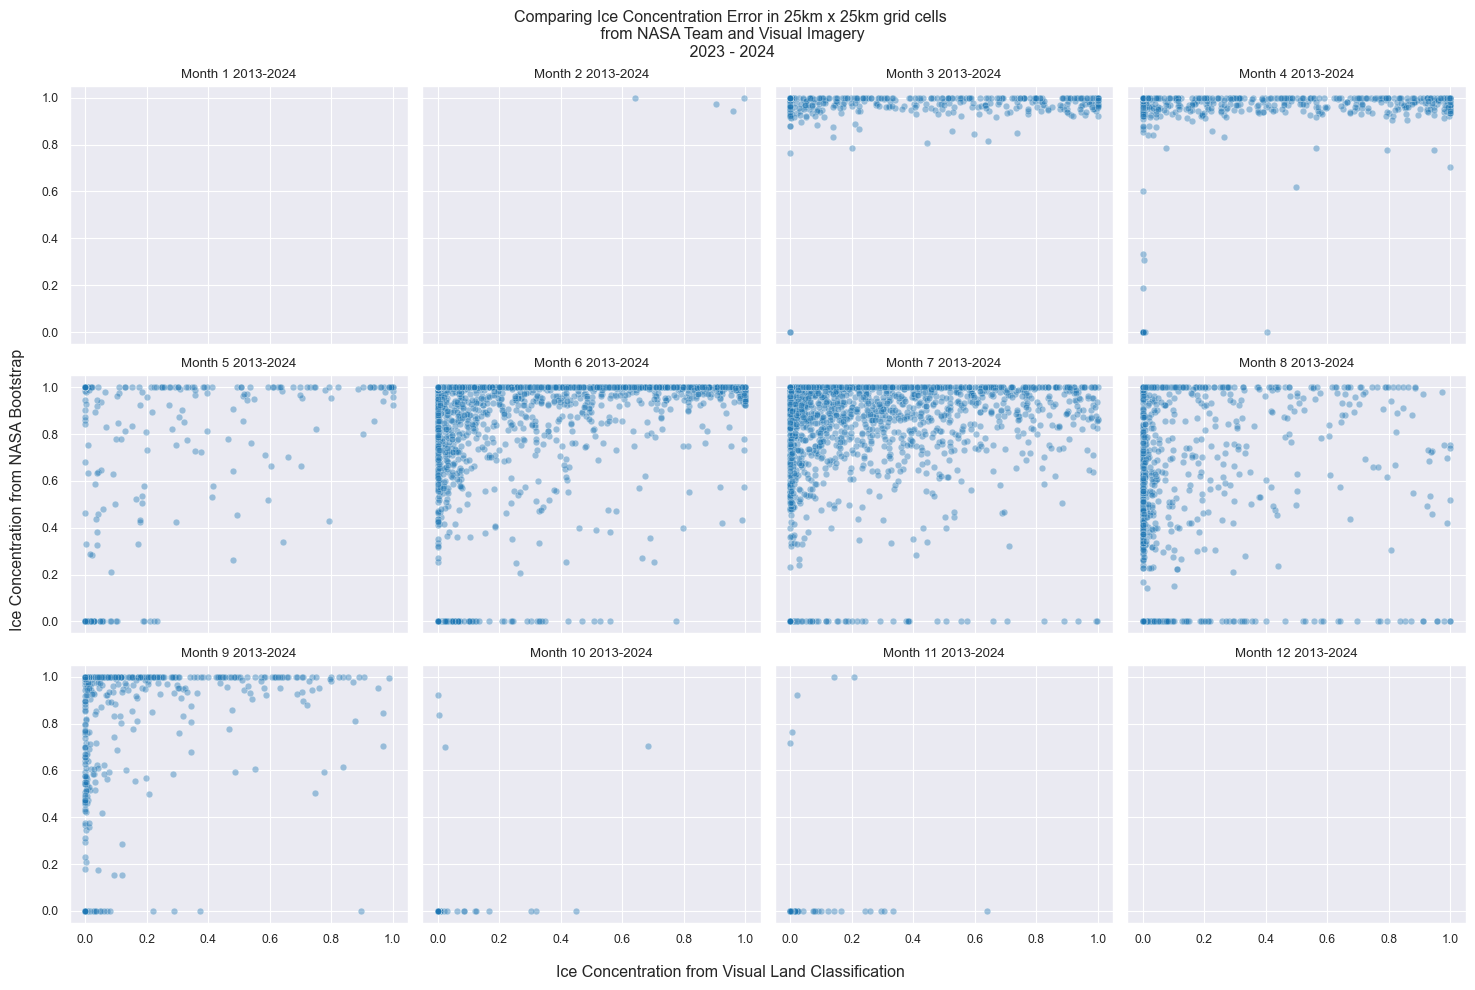

In [71]:
sns.set_context('paper')
fig, axes = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# loop through months

for month in range(1, 13):
    ax = axes[month - 1]
    data_month = data.loc[data['date'].dt.month == month]
    sns.scatterplot(
        data=data_month,
        x='visual_ice',
        y='bootstrap_icecon',
        alpha=0.4,
        ax=ax
    )
    ax.set_title(f'Month {month} 2013-2024')
    ax.set_xlabel('')
    ax.set_ylabel('')

# edit shared labels and title

fig.suptitle('Comparing Ice Concentration Error in 25km x 25km grid cells\n from NASA Team and Visual Imagery\n 2023 - 2024')
fig.supxlabel('Ice Concentration from Visual Land Classification')
fig.supylabel('Ice Concentration from NASA Bootstrap\n ')
plt.tight_layout()
plt.show()